## Evaluation Project - 2 Avacado Project

### Problem Statement:
#### Avocado is a fruit consumed by people heavily in the United States.


## Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado
type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


In [20]:
#Let's start with importing necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings ('ignore')

## 1) importing data


In [24]:
#importing  data 
df=pd.read_csv(r"Avacado.csv")

In [25]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
df["Date"]= pd.to_datetime(df["Date"])
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


## 2) Drop Unnamed column


In [29]:
df2=df.drop(['Unnamed: 0','Date',],axis=1)

In [30]:
df2.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


## 3) Check data type of each column


In [31]:
#  check  data type of each column 
df2.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
dtype: object

## 4) Checking Null Values in DataFrame


In [32]:
# Checking Null Values in DataFrame
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

## There are no null values in data set ✓

## 5) check the duplicates

In [33]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month


### There is no duplicate value in data set ✅

## 6) check the descriptive statistics about data set


In [34]:
df2.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


## 7) Performing EDA


In [35]:
def EDA(col): # function to plot the graphs
    print(col)
    print(df2[col].describe())
    print('\n')
    plt.plot()
    sns.distplot(df2[col]) #distrubution plot to check the skewness
    plt.show()
    print('\n')
    plt.plot()
    df2[col].hist(grid=True) # Histgram to check the scale 
    plt.show()
    print('\n')
    plt.plot()
    sns.boxplot(df2[col]) # for the outliers
    plt.show()

Total Volume
count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64




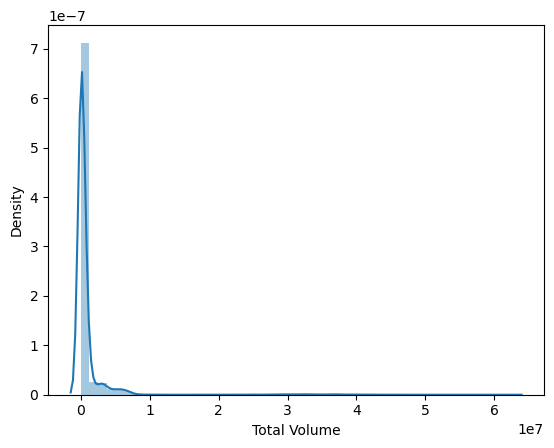

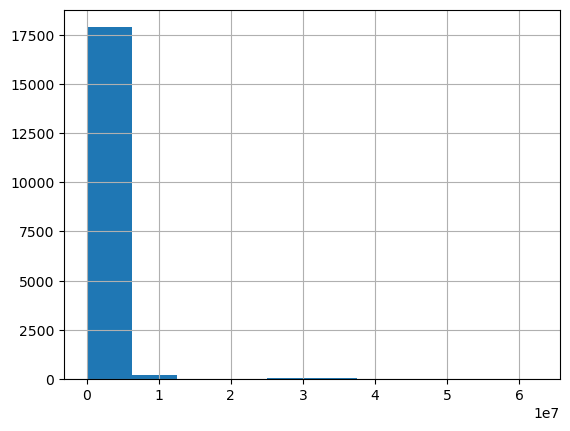

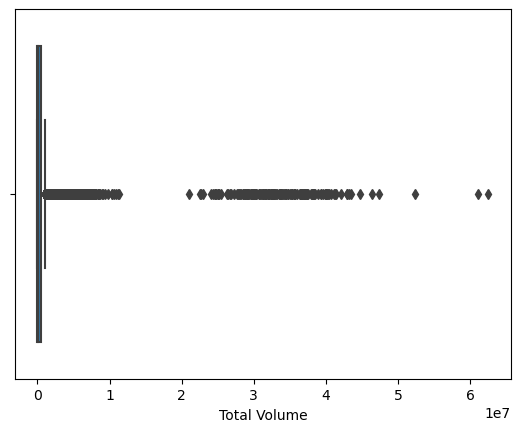

In [36]:
EDA('Total Volume') # call the function and check  the graphical presentation 

### There is clear-cut evidence that the 1.There is skewness. 2.There are outliers. present in Total Volume column . same we will check for the all column

4225
count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64




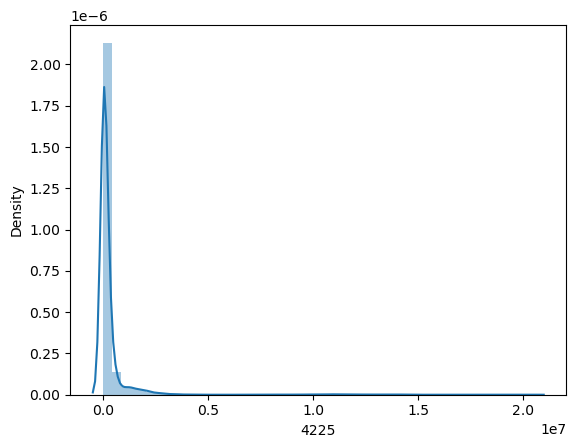

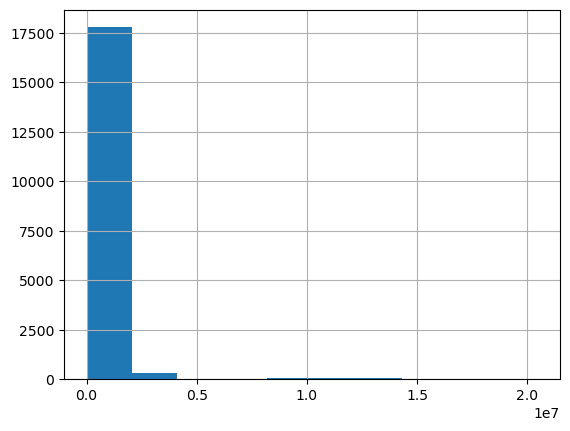

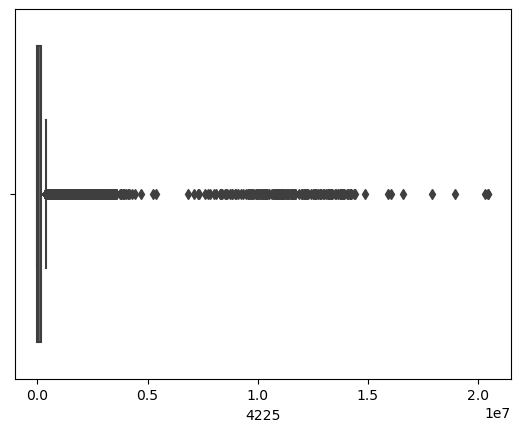

In [37]:
EDA('4225')

Total Bags
count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64




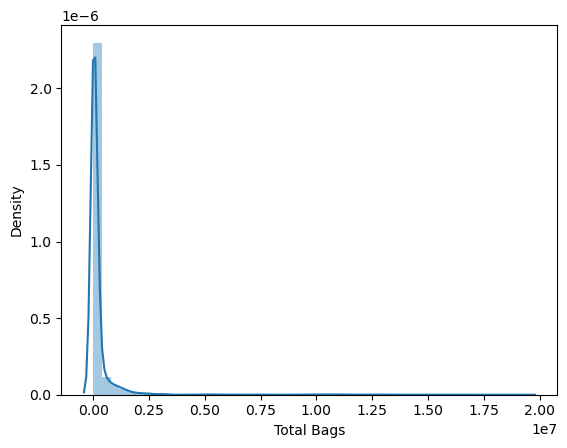

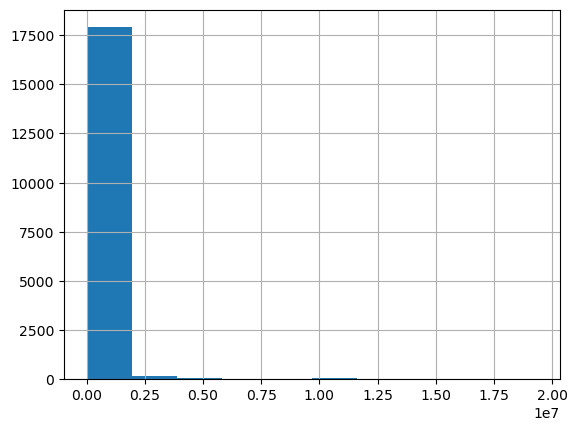

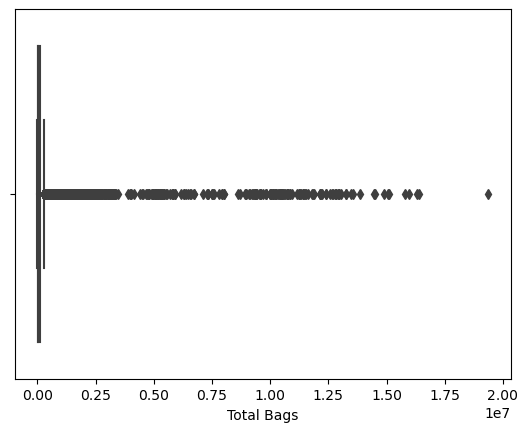

In [38]:
EDA('Total Bags')

Small Bags
count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: Small Bags, dtype: float64




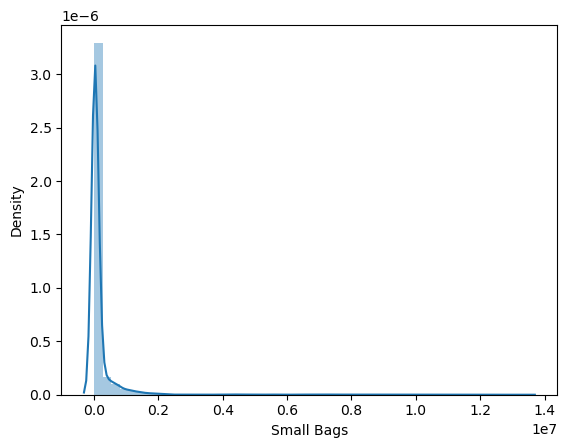

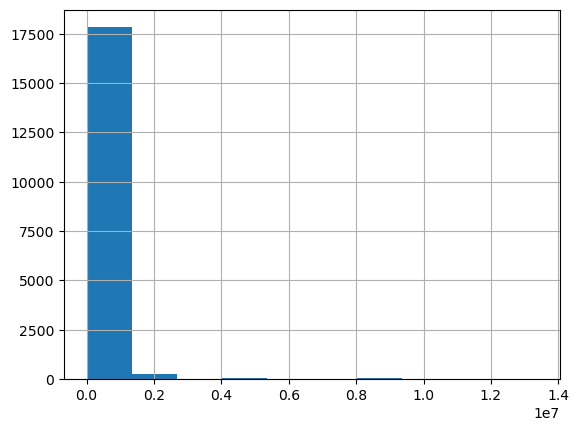

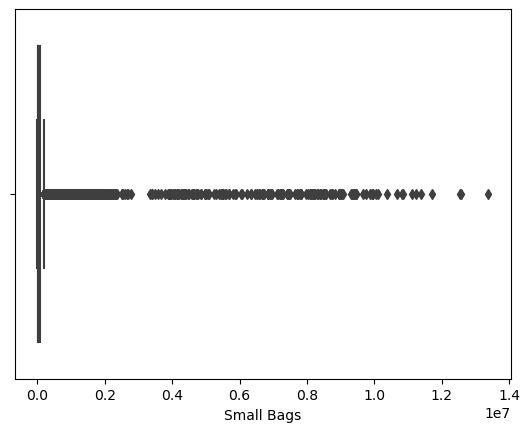

In [39]:
EDA('Small Bags')

Large Bags
count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: Large Bags, dtype: float64




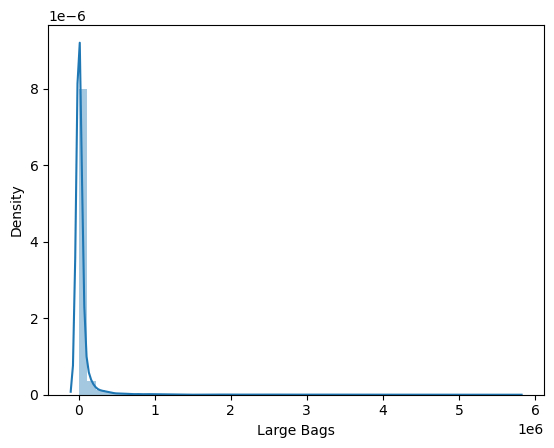

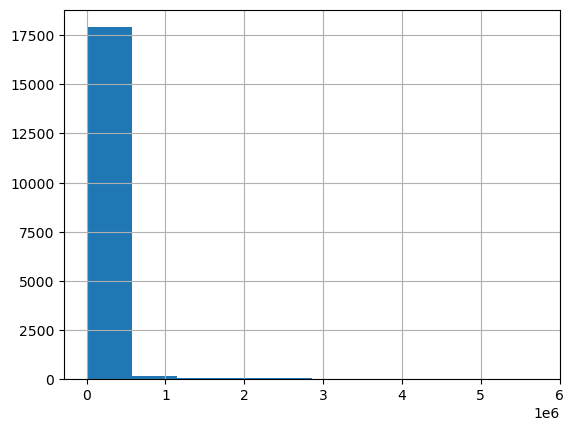

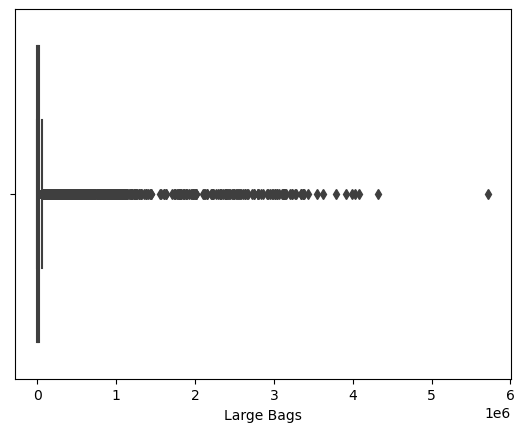

In [40]:
EDA('Large Bags')

XLarge Bags
count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64




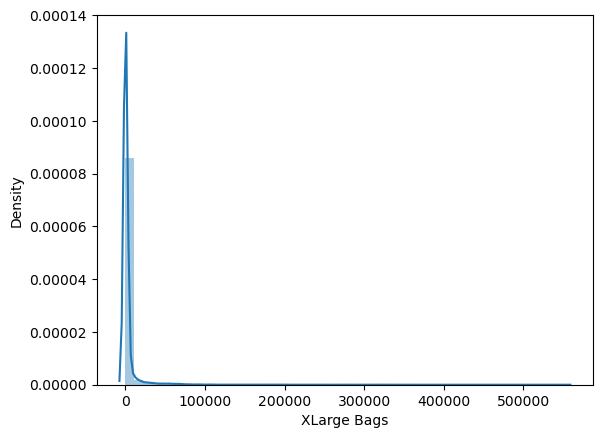

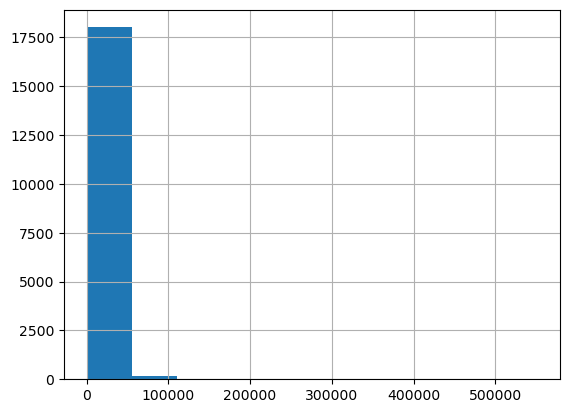

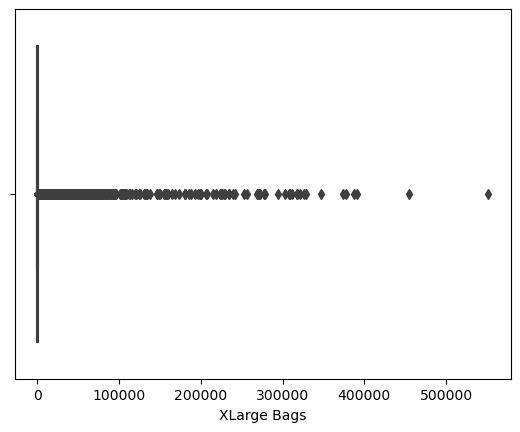

In [41]:
EDA('XLarge Bags')

year
count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64




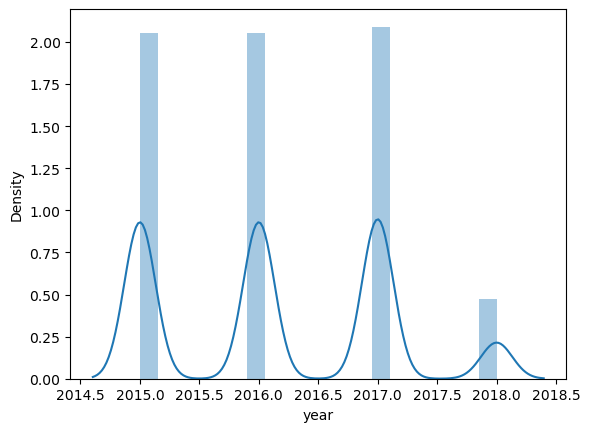

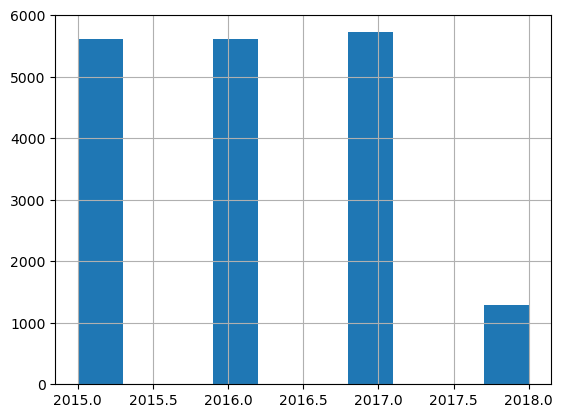

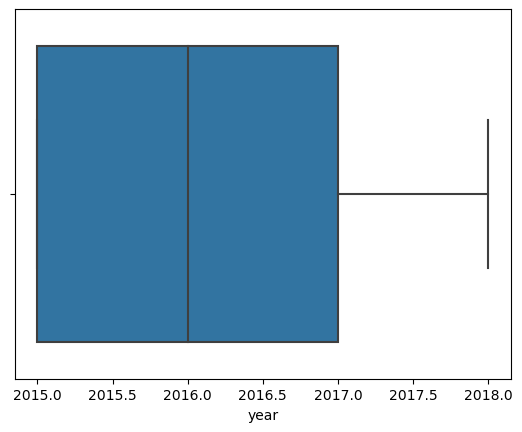

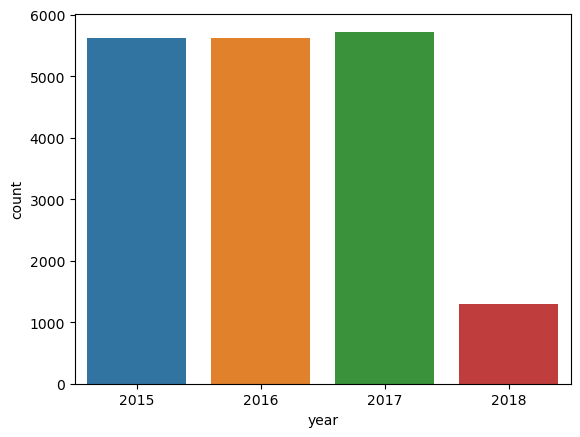

In [42]:
EDA('year')
# count plot on single categorical variable
sns.countplot(x ='year', data = df)
 
# Show the plot
plt.show()

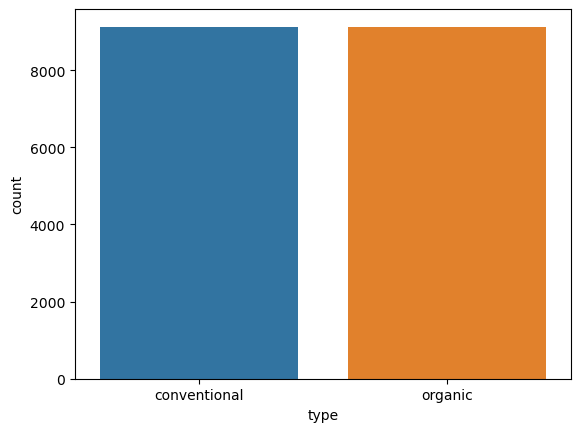

In [43]:
# count plot on single categorical variable
sns.countplot(x ='type', data = df)
 
# Show the plot
plt.show()

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

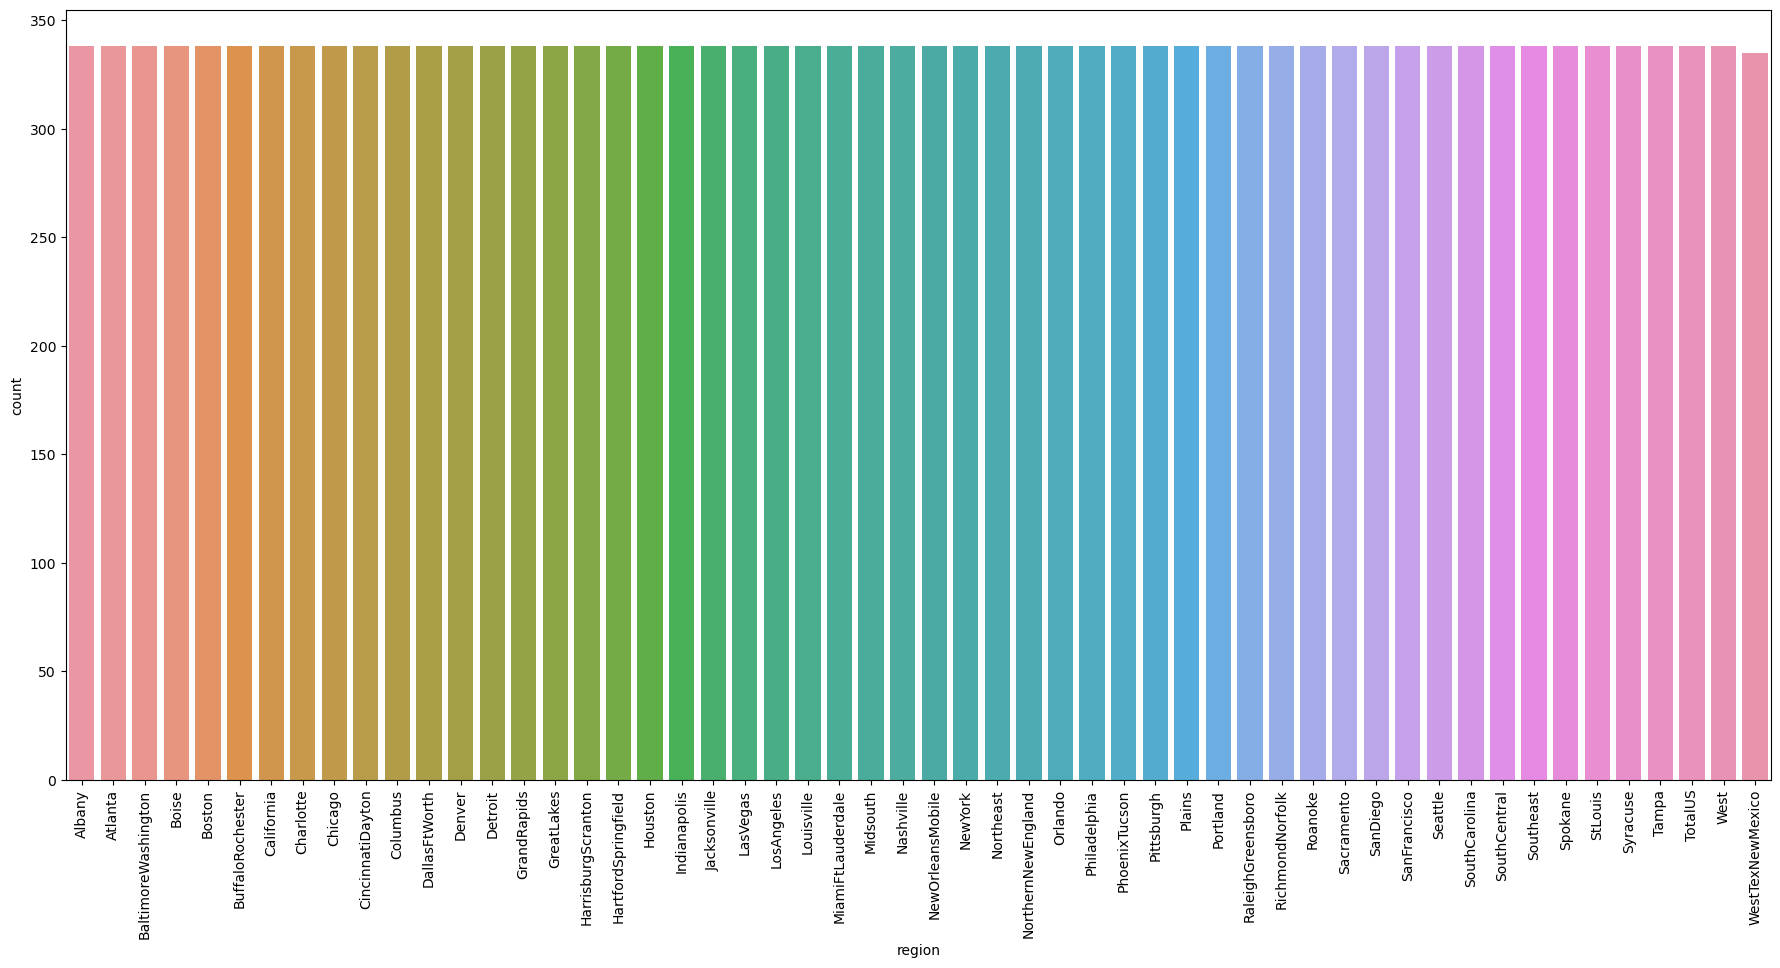

In [44]:
# count plot on single categorical variable
plt.figure(figsize=(22,10))
count1=sns.countplot(df['region'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

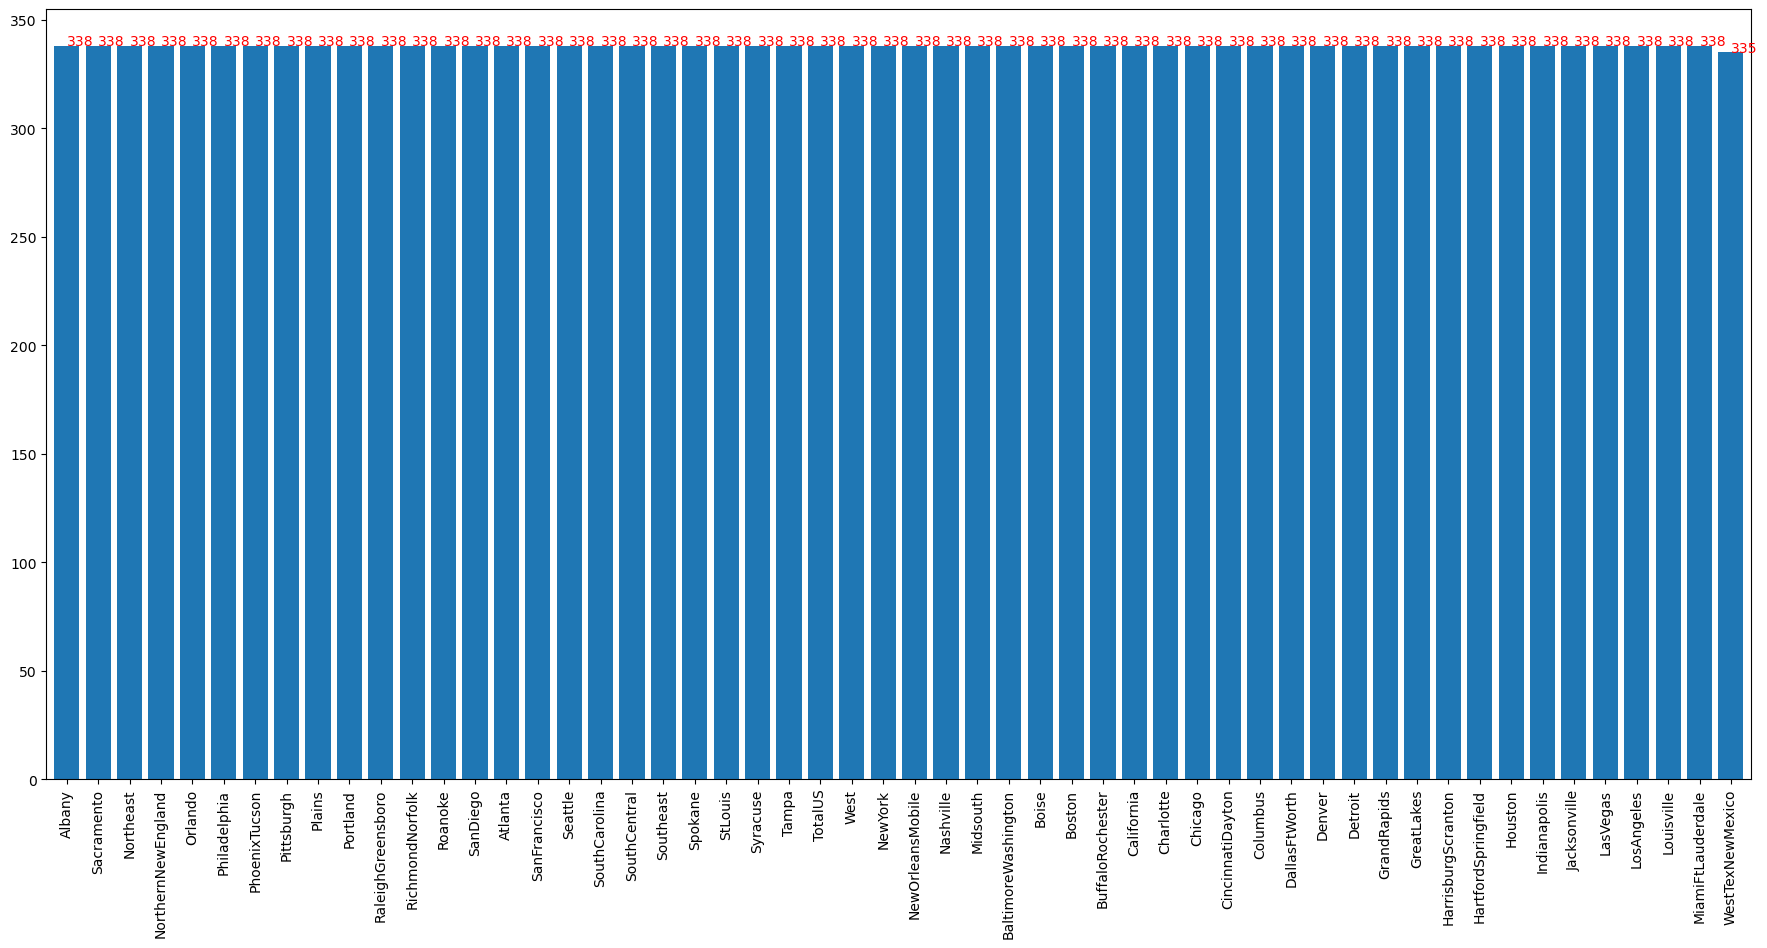

In [45]:
plt.figure(figsize=(22,10))
s = df['region'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.region + 0.2 , v.region, color='red')
plt.show()

## Now we are going to check that how 'Average Price' going to swing over the period of time



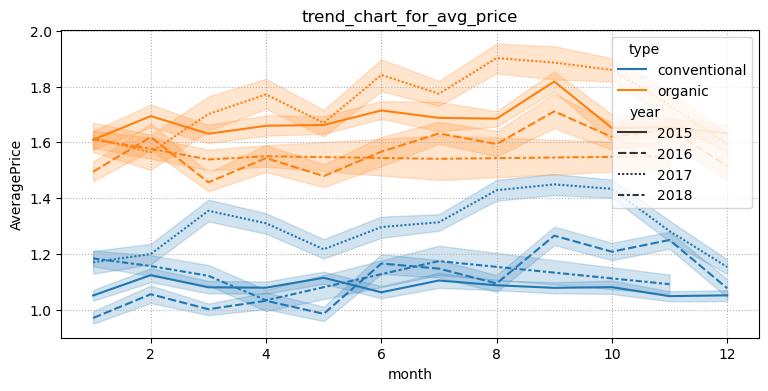

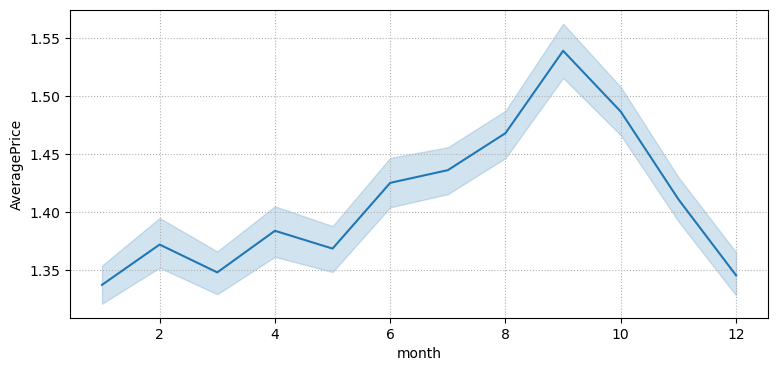

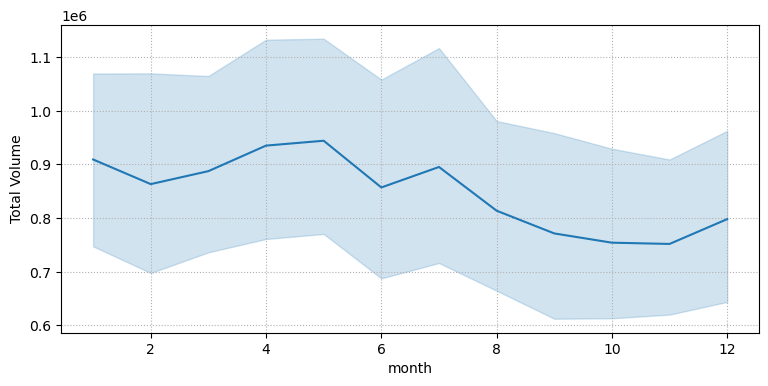

In [46]:
from matplotlib import rcParams
rcParams['figure.figsize']= 9,4
sns.lineplot(x = 'month', y = 'AveragePrice', data =df2, hue = 'type',style='year')
plt.grid(True, linestyle=':')
plt.title('trend_chart_for_avg_price')
plt.show()
from matplotlib import rcParams
rcParams['figure.figsize']= 9,4
sns.lineplot(x = 'month', y = 'AveragePrice', data =df2)
plt.grid(True, linestyle=':')
plt.show()
from matplotlib import rcParams
rcParams['figure.figsize']= 9,4
sns.lineplot(x = 'month', y = 'Total Volume', data =df2)
plt.grid(True, linestyle=':')
plt.show()

## EDA Observations:

Wow! From above chart we have observed some interesting facts 

1) Average Price for the conventional type is lower than organic

2) the price is lower in the month 2 (i.e feb)

3)Total volume is inversionally proportional to Average price, as price decreases supply increases

4)Why Price was too high in year 2017 !!!!

In [47]:
df.skew() # before removing outlires

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
month            0.047551
dtype: float64

## 8 ) Removing the Outliers by using Zscore method



In [48]:
# with std 3 Lets see the stats
#from scipy import stats
# Zscore = (x-mean)/std=> You have seen this in standard scaler

#### z = (x - mean)/std 
from scipy.stats import zscore

z_score= zscore(df2 [['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags','XLarge Bags']])
abs_z_score= np.abs(z_score) # Apply the formula and get the scaled data
filtering_entry = (abs_z_score < 1.0).all(axis=1)
df1=df2[filtering_entry]

In [49]:
df1.shape # after removing some outliers

(16606, 13)

In [50]:
df2.shape # after removing some unwnted column 

(18249, 13)

In [51]:
df.shape # orignal data set

(18249, 15)

In [52]:
data_loss = ((18249-16606)/18249)*100 #check the data loss 
data_loss

9.003233053865966

## we consider that 10 is acceptable data loss... our is 9.0032



In [53]:
df1.skew() # after removing skweness

AveragePrice    0.527121
Total Volume    2.903840
4046            3.752817
4225            3.440422
4770            4.997471
Total Bags      3.528068
Small Bags      3.900906
Large Bags      3.730972
XLarge Bags     5.304186
year            0.218801
month           0.037921
dtype: float64

## 9) Performing the encoding technique on categorical colomn region and type Here i am using labelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['region']=le.fit_transform(df1['region'])

In [55]:
df1['region'].value_counts()

0     338
23    338
26    338
27    338
1     338
31    338
32    338
34    338
37    338
38    338
39    338
40    338
41    338
42    338
44    338
47    338
48    338
49    338
50    338
24    338
30    338
10    338
16    338
4     338
5     338
7     338
21    338
2     338
3     338
17    338
20    338
19    338
33    337
43    337
9     337
14    335
36    334
53    332
11    330
28    326
35    323
13    318
18    313
12    290
8     279
25    222
22    188
46    181
15    174
52    170
6     169
29    169
45    169
51    157
Name: region, dtype: int64

In [56]:
#creating the dictionary to know which label represents what
le.fit(df['region'])
encoded_data=le.transform(df['region'])
label_value_dict=dict(zip(range(len(le.classes_)),le.classes_))

In [57]:
label_value_dict[2]

'BaltimoreWashington'

In [58]:
le=LabelEncoder()
df1['type']=le.fit_transform(df1['type'])

In [59]:
df1['type'].value_counts()

1    9111
0    7495
Name: type, dtype: int64

## 10) Separating features and lable



In [60]:
f = df1.drop(columns=['AveragePrice', 'year'], axis=1) #f for features
l = df1.AveragePrice #l for label

## 11) Checking Correlation and multicollinearity



<AxesSubplot:>

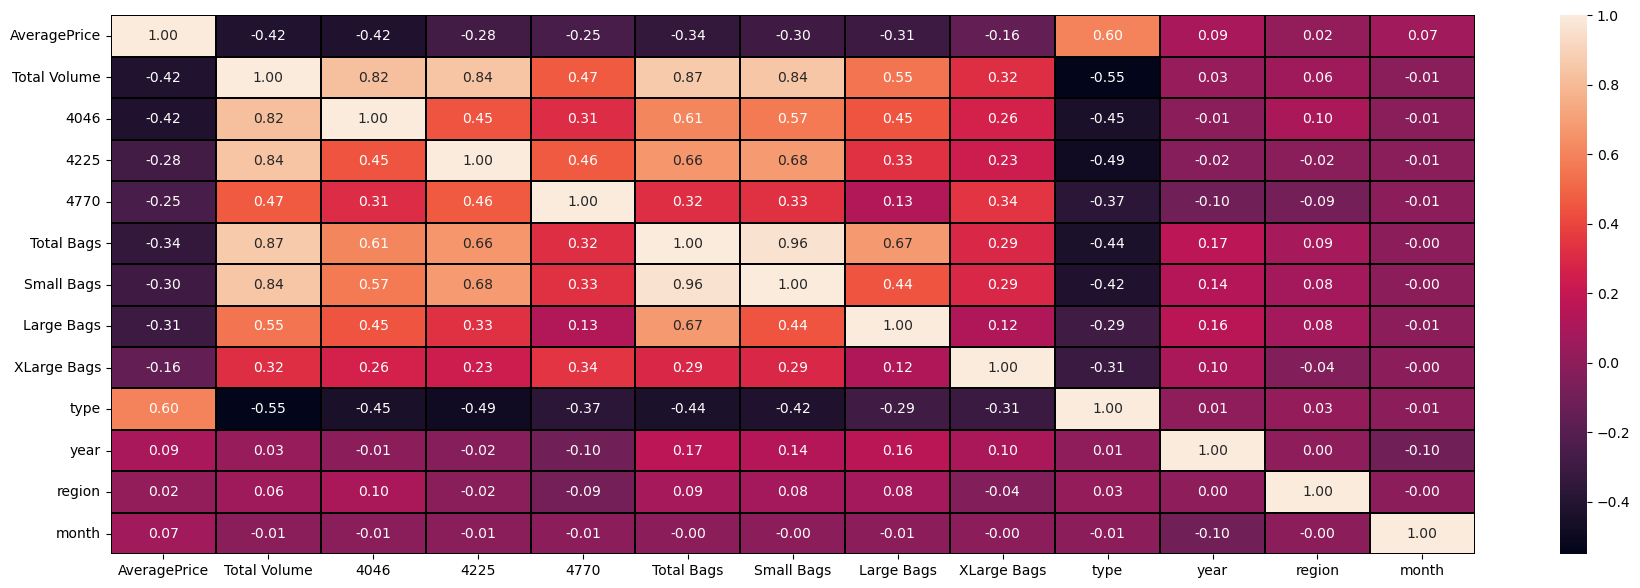

In [61]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

#### Correlation of column with the target column



In [62]:
df1.corr()['AveragePrice'].sort_values()

4046           -0.421471
Total Volume   -0.415698
Total Bags     -0.339765
Large Bags     -0.307575
Small Bags     -0.295680
4225           -0.278299
4770           -0.250191
XLarge Bags    -0.155391
region          0.018523
month           0.069294
year            0.092715
type            0.595436
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [63]:
f.corrwith(l) # Correlation of column with the target column

Total Volume   -0.415698
4046           -0.421471
4225           -0.278299
4770           -0.250191
Total Bags     -0.339765
Small Bags     -0.295680
Large Bags     -0.307575
XLarge Bags    -0.155391
type            0.595436
region          0.018523
month           0.069294
dtype: float64

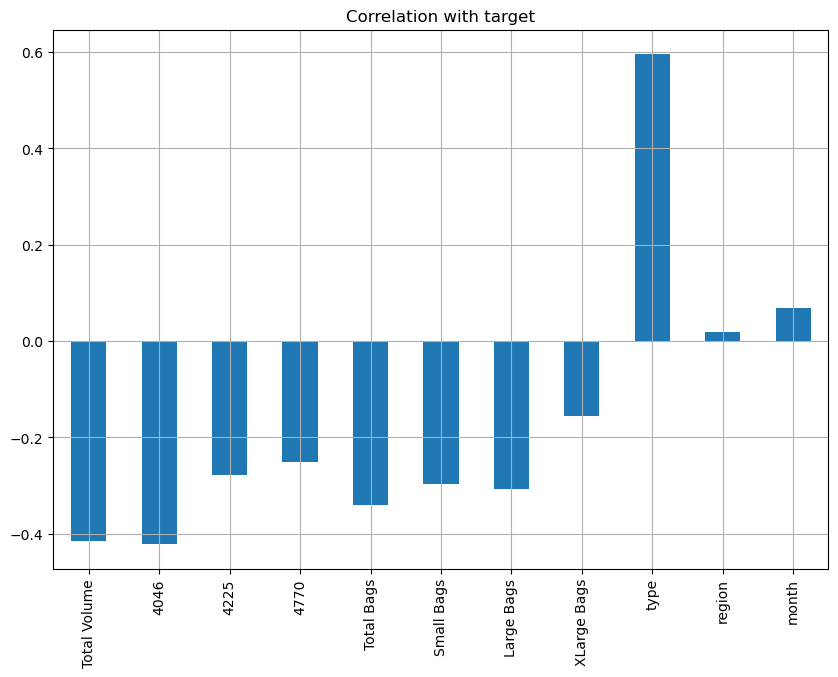

In [64]:
f.corrwith(l).plot(kind='bar',grid=True,figsize=(10,7), # Correlation with lable by graphical representation
title='Correlation with target')
plt.show()

#### Region has very less relation with our target



## 12) Checking highly correlated features



In [65]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [66]:
corr_features = correlation(df1, 0.75)
len(set(corr_features))

4

In [67]:
corr_features #highly correlated features name

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [68]:
corr_features #highly correlated features name

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [69]:
f2=f.drop(labels=corr_features,axis=1) #Dropping highly correlated features name

In [70]:
f2

,Total Volume,4770,Large Bags,XLarge Bags,type,region,month
0,64236.62,48.16,93.25,0.0,0,0,12
1,54876.98,58.33,97.49,0.0,0,0,12
2,118220.22,130.50,103.14,0.0,0,0,12
3,78992.15,72.58,133.76,0.0,0,0,6
4,51039.60,75.78,197.69,0.0,0,0,11
...,...,...,...,...,...,...,...
18244,17074.83,0.00,431.85,0.0,1,53,4
18245,13888.04,0.00,324.80,0.0,1,53,1
18246,13766.76,727.94,42.31,0.0,1,53,1
18247,16205.22,727.01,50.00,0.0,1,53,1


## 13) Cheaking VIF(Variance Inflation factor)



In [71]:
#Checking for the multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
    vif = dict()
    vif["FeatureColumns"] = Data.columns
    vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
    return(pd.DataFrame(vif))



CalculateVIF(f2)

,FeatureColumns,VIF
0,Total Volume,2.869466
1,4770,1.566117
2,Large Bags,1.764867
3,XLarge Bags,1.282080
4,type,2.380571
5,region,3.012438
6,month,2.898557


## Note,
1) std value for vif is 5.

2) if vif value is > 5 then there is possibilities multicollinearity problem

3) std value for vif can be different by project / it depend on data set or project

Conclusion : VIF values are less than 5 for all colomn That means there is no multicollinearity problem exist.



## 14) Data Scaling Standard Scaler

In [72]:
scalar = StandardScaler()
f_scaled = scalar.fit_transform (f2)

In [73]:
f_scaled.shape

(16606, 7)

## 15) Best feature selection By using SelectKBest feature Selection method.

In [74]:
from sklearn. feature_selection import SelectKBest, f_regression
best_features = SelectKBest(score_func=f_regression, k=10) # k means how many feature we want to select from  out off
fit= best_features.fit (f,l)

df_scores = pd.DataFrame (fit.scores_)
df_columns= pd.DataFrame (f.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score'] # name output columns

print (feature_scores.nlargest (10, 'Score')) # print 17 best features

    Feature_Name        Score
8           type  9120.464773
1           4046  3586.610160
0   Total Volume  3468.652357
4     Total Bags  2166.925801
6     Large Bags  1734.906881
5     Small Bags  1590.702374
2           4225  1393.944341
3           4770  1108.741289
7    XLarge Bags   410.844598
10         month    80.110645


In [75]:
best_top_10f=df1[['type','4046','Total Volume','Total Bags','Large Bags','Small Bags','4225','4770','XLarge Bags','month']]

## 16) Split data into train and test

In [76]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [77]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(f2,l,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.4058183719971302 on random state 133


In [78]:
x_train, x_test, y_train, y_test = train_test_split(f2, l, test_size=0.3, random_state=133)

## 17) Model Building

In [79]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),2))

r2 score is : 0.41
RMSE: 0.31
mean absolute error: 0.24


In [80]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [82]:
#lasso model
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),2))


r2 score is : 0.41
RMSE: 0.31
mean absolute error: 0.24


In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [85]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),2))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),2))

r2 score is : 0.77
RMSE: 0.2
mean absolute error: 0.14


In [86]:
svr = SVR()
svr.fit(x_train, y_train)
predsvr=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsvr)),3))

r2 score is : 0.353
RMSE: 0.325
mean absolute error: 0.249


## Random Forest Model is Performing better for this project 